In [1]:
import sys
import os.path as op
module_path = op.abspath(op.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from scipy.io import loadmat
import hypyp
import mne
import numpy as np

from data_analysis.functions_connectivity import \
    plot_connectivity_matrix
from data_analysis.functions_behavioral import \
    (create_event_df, remove_ghost_triggers, calculate_alpha,
     join_event_dfs, remove_outliers, events_from_event_df)

import matplotlib.pyplot as plt

result_dir = "/net/store/nbp/projects/hyperscanning/study_project/results/"

In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /net/store/nbp/projects/hyperscanning/study_project/programming_tools/miniconda3/envs/hyperscanning/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /net/store/nbp/projects/hyperscanning/study_project

In [2]:
subj = 203
cond = "early"
ispcs = loadmat(op.join(result_dir, "ispc_matrices", str(subj) + "_" + cond + ".mat"))[cond]

#mne.viz.plot_

In [3]:
ispcs[0, :, :, 0].shape

(128, 128)

In [3]:
tfr = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + cond))[0]

Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early ...


<ipython-input-3-f30baabdb29c>:1: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  tfr = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + cond))[0]


Not setting metadata


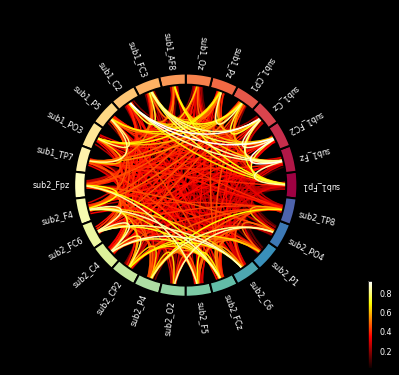

<Figure size 432x288 with 0 Axes>

In [12]:
mne.viz.plot_connectivity_circle(ispcs[0, ::5, ::5, 0], node_names=tfr.ch_names[::5])
plt.savefig('connectivity_circle_{}.pdf'.format(subj)) 

In [7]:
avg_ispcs = np.mean(ispcs, axis=0)

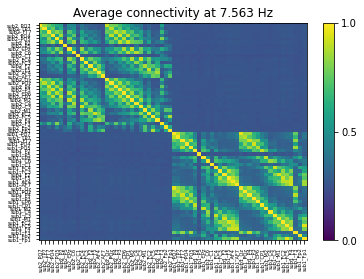

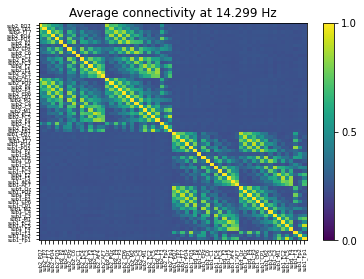

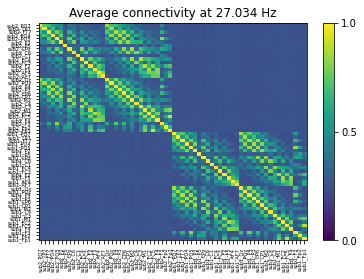

In [9]:
freq_i = 5
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))
#plt.savefig('{}_connectivity_matrix_frequ{}.pdf'.format(subj,freq_i)) 

freq_i = 10
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))

freq_i = 15
plot_connectivity_matrix(avg_ispcs[::2, ::2, freq_i], node_names=tfr.ch_names[::2],
                         title="Average connectivity at {} Hz".format(np.round(tfr.freqs[freq_i], 3)))

Intra vs Inter brain bar plots

In [ ]:
inter_b = [np.mean(avg_ispcs[0:64, 64:2*64, i]) for i in range(len(tfr.freqs))]
intra_b = [np.mean(avg_ispcs[0:64, 0:64, i]) for i in range(len(tfr.freqs))]

In [ ]:
plt.plot(tfr.freqs, inter_b, tfr.freqs, intra_b)
plt.legend(["inter", "intra"])

In [ ]:
x = tfr.freqs  # the label locations
width = np.diff(x) # the width of the bars
width = np.append(width, [5.5], axis = 0)
width /=3

fig, ax = plt.subplots(figsize=(15,7))
rects1 = ax.bar(x - width/2, inter_b, width, label='Inter-Brain',align="edge")
rects2 = ax.bar(x + width/2, intra_b, width, label='Intra-Brain',align="edge")

labels = [str(round(i,2)) for i in tfr.freqs]


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ISPCs')
ax.set_title('Average Inter- vs. intrabrain connectivity strength (ISPC) over Frequency Bands')
ax.set_xscale('log')
ax.set_xticks(x+width)
ax.set_xticklabels(labels)


#ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

#todo: bin frequencies and make a bar plot of data

## load and plot the Small world indices

In [ ]:
swis = loadmat(op.join(result_dir, "small_worlds", str(subj) + "_" + cond + ".mat"))[cond]

avg_swis = np.mean(swis, axis=0)

plt.plot(tfr.freqs, avg_swis)
plt.title("SWI over frequencies for subject pair {}".format(subj))
plt.xlabel("Frequency in Hz")
plt.ylabel("SWI")

## load the behavioral data and bad trials (which were filtered by autoreject)

In [7]:
import pandas as pd
import glob


behav_path = "/net/store/nbp/projects/hyperscanning/study_project/dirk/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData"

In [ ]:
# do the behavioral analysis and get the epochs
df = calculate_alpha(df)

In [ ]:
# remove all the trials that were removed by autoreject
bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(subj) + ".mat"))
remove = list(bad_trials["drop_list"] +1)
df[np.logical_not(df["trial"].isin(remove))]
df

In [ ]:
behavioral_df

# save time of first and last tap per trial in dataframe
first_tap = behavioral_df.index - behavioral_df.index[behavioral_df.index%9]
#behavioral_df["first_tap"] = behavioral_df["ttap"][first_tap].to_numpy()
#last_tap = behavioral_df.index - behavioral_df.index[(behavioral_df.index%9)] +8
#behavioral_df["last_tap"] = behavioral_df["ttap"][last_tap].to_numpy()

first_tap

### Save all dropped data 

In [14]:
import pandas as pd
import os
import glob
behav_res_path = "/net/store/nbp/projects/hyperscanning/study_project/anne/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData_Alphas/Trials_with_double_taps/"

For all pairs

In [ ]:
pair_list = pd.read_csv('pair_list.csv')

for pair in pair_list.pair_name[6:]:
    print("Pair {}:".format(pair))
    df_doubletaps_trials = pd.read_csv(op.join(behav_res_path, str(pair) + "_lost_taps.csv"))
    print("Amount of lost trials due to double taps:",round(len(df_doubletaps_trials)/3,2),"%")

    bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(pair) + ".mat"))
    bad_trials = [item for sublist in bad_trials["drop_list"] for item in sublist]
    print("Amount of lost trials due to EEG cleaning:",round(len(bad_trials)/3,2),"%")

    combine_bads = list(bad_trials)
    combine_bads.extend(x for x in df_doubletaps_trials.trial if x not in combine_bads)
    print("Total amount of lost trials:",round(len(combine_bads)/3,2),"%", "\n")




## Make tests with ISCPs

In [8]:
subj = 206
phases_early = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "early"))[0]
phases_late = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "late"))[0]


#mne.viz.plot_

Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/206_early ...


<ipython-input-8-251e241c8e25>:2: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/206_early) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  phases_early = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "early"))[0]


Not setting metadata
Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/206_late ...


<ipython-input-8-251e241c8e25>:3: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/206_late) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  phases_late = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(subj) + "_" + "late"))[0]


Not setting metadata


# PLOTS

In [9]:
# do the behavioral analysis and get the epochs
df = pd.read_csv(op.join(behav_path, str(subj) + ".csv"))
df = calculate_alpha(df)

# load the swis
swis = loadmat(op.join(result_dir, "small_worlds", str(subj) + "_" + cond + ".mat"))[cond]

# remove all the trials that were removed by autoreject
bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(subj) + ".mat"))["drop_list"][0]
double_taps = loadmat(op.join(result_dir, "double_taps", str(subj) + ".mat"))["double_taps"][0]

# remove the epochs marked as bad from autoreject
df = df[np.logical_not(df["trial"].isin(bad_trials + 1))]

# add the positive trial indices to remove double taps
trial_n = np.array([i for i in range(300) if i not in bad_trials]) + 1

# remove the epochs marked as bad from double taps
df = df[np.logical_not(df["trial"].isin(double_taps))]
swis = np.array([vals for trial, vals in zip(trial_n, swis) if trial not in double_taps])

print(len(swis), len(set(df["trial"])))



FileNotFoundError: [Errno 2] No such file or directory: '/net/store/nbp/projects/hyperscanning/study_project/anne/NBP_Hyperscanning/data_analysis/Behavioural_Analysis/BehaviouralData_Alphas/Trials_with_double_taps/206.csv'

In [ ]:
df = df.sort_values("trial")

# get the average alpha for early
early_start = df.groupby(["trial"])["ttap"].min()
early_stop = early_start + 1.5

early_avg = []
for start, stop in zip(early_start, early_stop):
    df_filt = df[np.logical_and(df["ttap"] >= start, df["ttap"] <= stop)]
    early_avg.append(df_filt["alpha_lin"].mean())
print(early_stop.shape)

# get the average alpha for late
# same for old
late_stop = df.groupby(["trial"])["ttap"].max()
late_start = late_stop - 1.5

trials = set(df["trial"])

late_avg = []
for trial, start, stop in zip(trials, late_start, late_stop):
    df_filt = df[np.logical_and(df["trial"] == trial , np.logical_and(df["ttap"] >= start, df["ttap"] <= stop))]
    late_avg.append(df_filt["alpha_lin"].mean())
print(late_stop.shape)

In [ ]:
trials = set(df["trial"])

alphas = []
alphalins = []
for trial in trials:
    df_filt = df[df["trial"] == trial]
    
    if cond == "early":
        start = df_filt["ttap"].min()
        stop = start + 1.5
    else:
        stop = df_filt["ttap"].max()
        start = stop - 1.5
        
    df_frame = df_filt[np.logical_and(df_filt["ttap"] >= start, df_filt["ttap"] <= stop)]
    
    alphas.append(df_frame["alpha"].mean())
    alphalins.append(df_frame["alpha_lin"].mean())
    
print(late_stop.shape)

In [ ]:
df_frame

In [ ]:
rs = []
for freq in range(swis.shape[-1]):
    r = np.corrcoef(swis[:, freq], early_avg)
    #plt.scatter(swis[:, freq], early_avg)
    #plt.show()
    rs.append(r[0, 1])
rs

In [ ]:
np.corrcoef(np.mean(swis, axis=-1), late_avg)

In [ ]:
plt.scatter(np.mean(swis, axis=-1), late_avg)
print(np.corrcoef(np.mean(swis, axis=-1), late_avg))

In [ ]:
min_idx = event_df.groupby(["trial"])["sample"].idxmin()
early_df = event_df[event_df.index.isin(min_idx)]
early_events = events_from_event_df(early_df)
early_events[:,-1] = 1

# get the late taps by looking at the last sample - 1.5 seconds
max_idx = event_df.groupby(["trial"])["sample"].idxmax()
late_df = event_df[event_df.index.isin(max_idx)]

### ALL SUBS

In [3]:
freqs = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(203) + "_" + "early"))[0].freqs

Reading /net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early ...


<ipython-input-3-98ae6358c995>:1: RuntimeWarning: This filename (/net/store/nbp/projects/hyperscanning/study_project/results/phase_angles/203_early) does not conform to MNE naming conventions. All tfr files should end with -tfr.h5 or _tfr.h5
  freqs = mne.time_frequency.read_tfrs(op.join(result_dir, "phase_angles", str(203) + "_" + "early"))[0].freqs


Not setting metadata


In [4]:
freqs
freqs_list = [round(i,2) for i in freqs]
freqs_list_strings = [str(round(i,2)) for i in freqs]
print(freqs_list)

[4.0, 4.54, 5.16, 5.86, 6.66, 7.56, 8.59, 9.76, 11.08, 12.59, 14.3, 16.24, 18.45, 20.95, 23.8, 27.03, 30.71, 34.88, 39.62, 45.0]


In [8]:
def plottable_data (subs, cond):

    ispc_list = []
    swi_list = []
    alpha_list = []
    alphalin_list = []

    for subj in subs:

        # do the behavioral analysis and get the epochs
        df = pd.read_csv(op.join(behav_path, str(subj) + ".csv"))
        df = calculate_alpha(df)

        # load the eeg based data
        swis = loadmat(op.join(result_dir, "small_worlds", str(subj) + "_" + cond + ".mat"))[cond]
        ispcs = loadmat(op.join(result_dir, "ispc_matrices", str(subj) + "_" + cond + ".mat"))[cond]

        # remove all the trials that were removed by autoreject
        bad_trials = loadmat(op.join(result_dir, "dropped_epochs", str(subj) + ".mat"))["drop_list"][0]
        double_taps = loadmat(op.join(result_dir, "double_taps", str(subj) + ".mat"))["double_taps"][0]

        # remove the epochs marked as bad from autoreject
        df = df[np.logical_not(df["trial"].isin(bad_trials + 1))]

        # add the positive trial indices to remove double taps
        trial_n = np.array([i for i in range(300) if i not in bad_trials]) + 1

        # remove the epochs marked as bad from double taps
        df = df[np.logical_not(df["trial"].isin(double_taps))]
        swis = np.array([vals for trial, vals in zip(trial_n, swis) if trial not in double_taps])
        ispcs = np.array([vals for trial, vals in zip(trial_n, ispcs) if trial not in double_taps])

        trials = set(df["trial"])

        alphas = []
        alphalins = []
        for trial in trials:
            df_filt = df[df["trial"] == trial]

            if cond == "early":
                start = df_filt["ttap"].min()
                stop = start + 1.5
            else:
                stop = df_filt["ttap"].max()
                start = stop - 1.5

            df_frame = df_filt[np.logical_and(df_filt["ttap"] >= start, df_filt["ttap"] <= stop)]
            df_frame = df_frame.dropna()

            alphas.append(df_frame["alpha"].mean())
            alphalins.append(df_frame["alpha_lin"].mean())

        # add them to the lists:
        ispc_list.append(ispcs)
        swi_list.append(swis)
        alpha_list.append(alphas)
        alphalin_list.append(alphalins)

    ispc_list = np.concatenate([i for i in ispc_list], axis=0)
    swi_list = np.concatenate([i for i in swi_list], axis=0)
    alpha_list = np.concatenate([i for i in alpha_list], axis=0)
    alphalin_list = np.concatenate([i for i in alphalin_list], axis=0)

    indices = [idx for idx, val in enumerate(alpha_list) if not np.isnan(val)]

    ispc_list = ispc_list[indices]
    swi_list = swi_list[indices]
    alpha_list = alpha_list[indices]
    alphalin_list = alphalin_list[indices]

    ispc_inter = ispc_list[:, :64,64:,:]
    
    return ispc_list, swi_list, alphalin_list, ispc_inter

In [9]:
subs = ["202", "205", "206", "207", "208", "209", "211","212"]
cond = "early"

ispc_early, swi_early, alphalin_early, ispc_inter_early = plottable_data (subs, cond)

In [10]:
subs = ["202", "203", "204", "205", "206", "207", "208", "209", "211", "212"]
cond = "late"
ispc_late, swi_late, alphalin_late, ispc_inter_late = plottable_data (subs, cond)

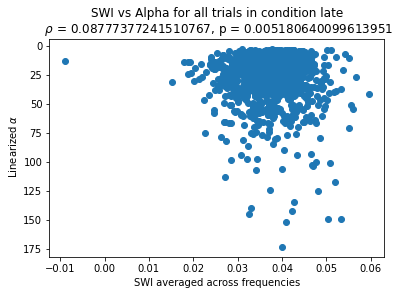

In [11]:
from scipy.stats import pearsonr

# np.mean(ispc_inter, axis=(1,2,3))
x_late  = np.mean(swi_late, axis=1)
y_late = alphalin_late
rho, sig = pearsonr(x_late, y_late)

plt.scatter(x_late, y_late)
plt.title("SWI vs Alpha for all trials in condition {0}\n $\\rho$ = {1}, p = {2}".format(cond, rho, sig))
plt.xlabel("SWI averaged across frequencies")
plt.ylabel(r" Linearized $\alpha$")
plt.gca().invert_yaxis()

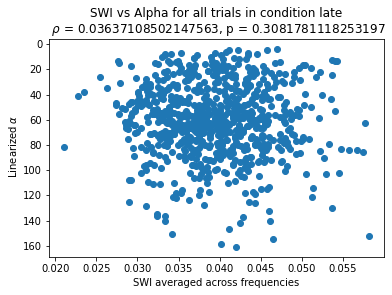

In [12]:
from scipy.stats import pearsonr

# np.mean(ispc_inter, axis=(1,2,3))
x_early = np.mean(swi_early, axis=1)
y_early = alphalin_early
rho, sig = pearsonr(x_early, y_early)

plt.scatter(x_early ,y_early)
plt.title("SWI vs Alpha for all trials in condition {0}\n $\\rho$ = {1}, p = {2}".format(cond, rho, sig))
plt.xlabel("SWI averaged across frequencies")
plt.ylabel(r" Linearized $\alpha$")
plt.gca().invert_yaxis()

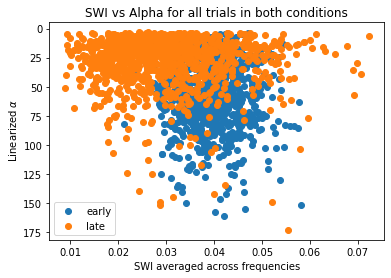

In [202]:
from scipy.stats import pearsonr

# np.mean(ispc_inter, axis=(1,2,3))
x_early = np.mean(swi_early, axis=1)
y_early = alphalin_early

plt.scatter(x_early, y_early)
plt.scatter(x_late, y_late)
plt.title("SWI vs Alpha for all trials in both conditions")
plt.xlabel("SWI averaged across frequencies")
plt.ylabel(r" Linearized $\alpha$")
          
plt.legend(["early", "late"])
plt.gca().invert_yaxis()
plt.savefig('SWI_alpha_avg.pdf')



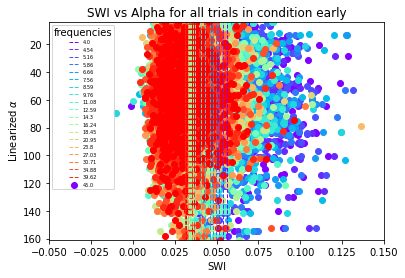

In [32]:
from matplotlib.pyplot import cm

color=iter(cm.rainbow(np.linspace(0,1,20)))


for freq_i in range(len(freqs_list)):
    swi = swi_early[:,freq_i]
    # np.mean(ispc_inter, axis=(1,2,3))
    x_early = swi
    y_early = alphalin_early

    rho, sig = pearsonr(x_early, y_early)
    c=next(color)
    plt.scatter(x_early ,y_early, color=c)
    plt.ylim(max(y_early), min(y_early))    
    plt.title("SWI vs Alpha for all trials in condition early")
    plt.xlabel("SWI")    
    plt.xlim(-0.05, 0.15)  
    plt.ylabel(r" Linearized $\alpha$")
    plt.legend(freqs_list, title ="frequencies", fontsize=5)
    plt.axvline(x_early.mean(), color=c, linestyle='dashed', linewidth=1)

plt.savefig('SWI_alpha_early_all.pdf')



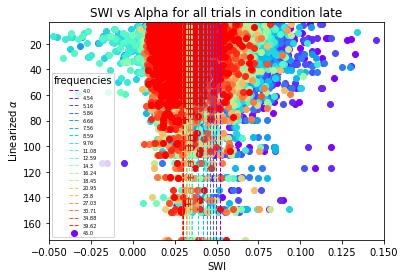

In [30]:
color=iter(cm.rainbow(np.linspace(0,1,20)))


for freq_i in range(len(freqs_list)):
    swi = swi_late[:,freq_i]
    # np.mean(ispc_inter, axis=(1,2,3))
    x_late = swi
    y_late = alphalin_late
    c=next(color)
    plt.scatter(x_late ,y_late, color=c)
    plt.ylim(max(y_late), min(y_late))    
    plt.xlim(-0.05, 0.15)  
    plt.title("SWI vs Alpha for all trials in condition late")
    plt.xlabel("SWI")
    plt.ylabel(r" Linearized $\alpha$")
    plt.legend(freqs_list, title ="frequencies",fontsize=5)
    plt.axvline(x_late.mean(), color=c, linestyle='dashed', linewidth=1)
plt.savefig('SWI_alpha_late_all.pdf')
  

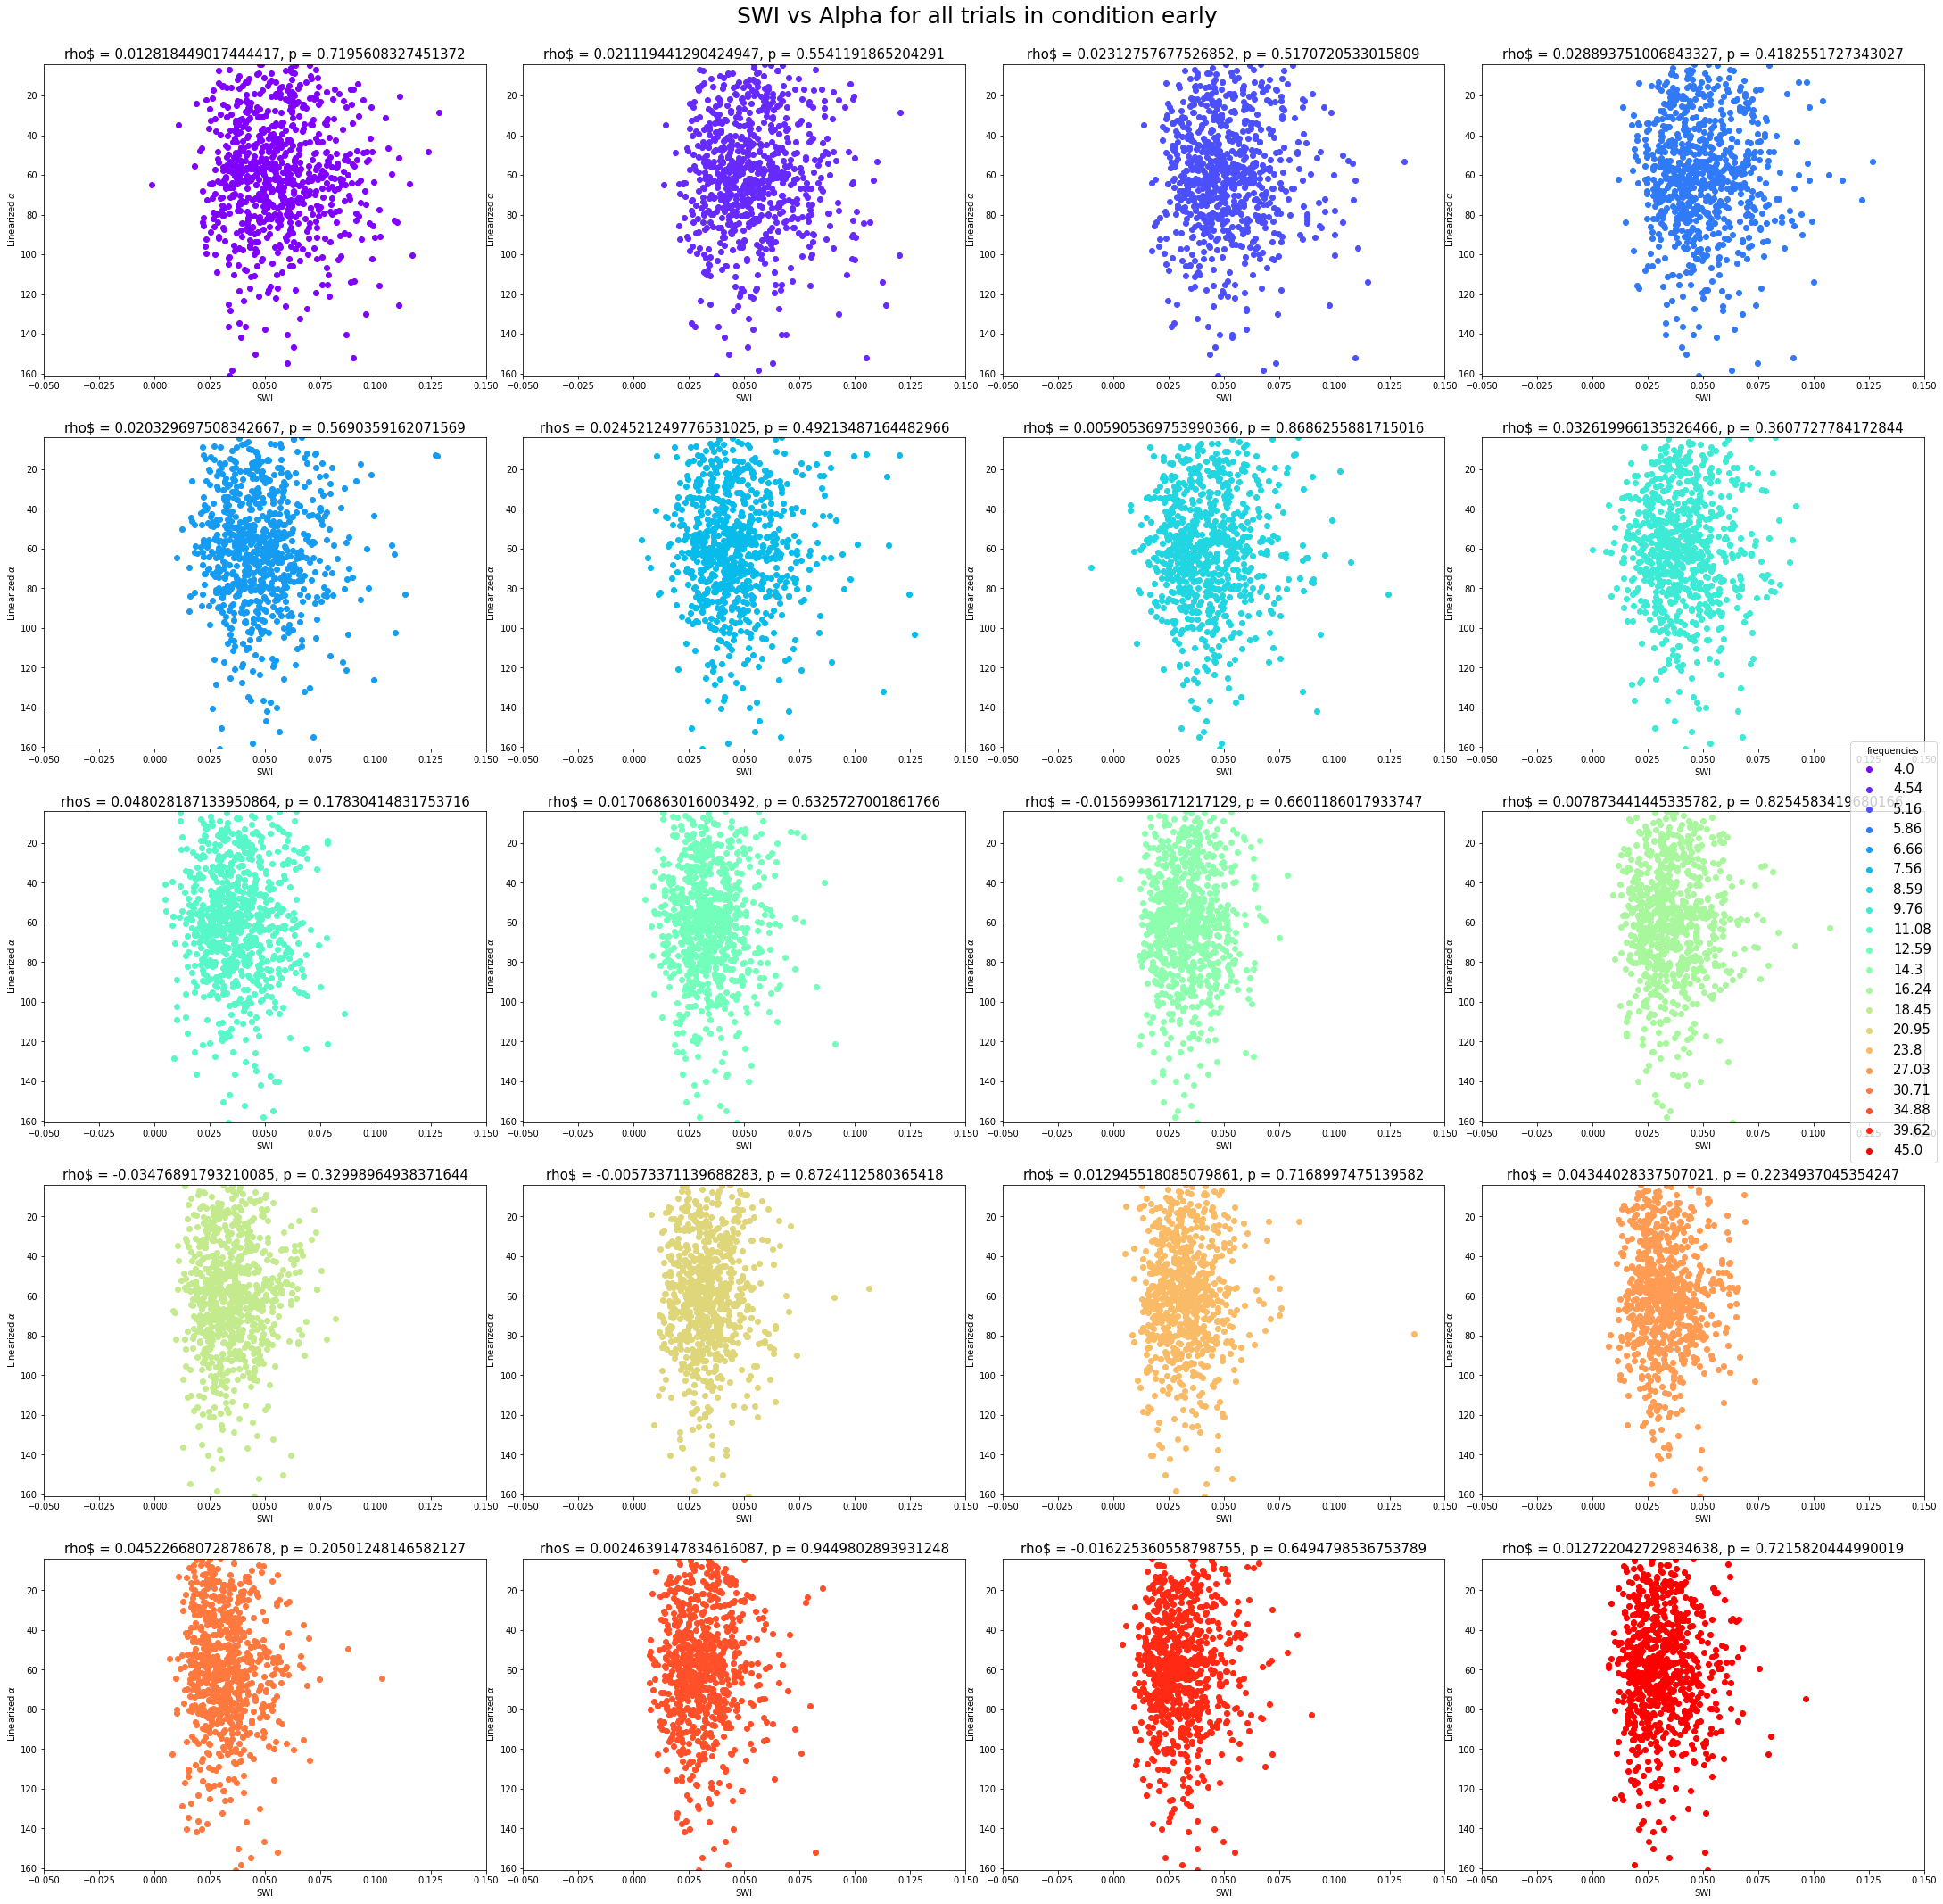

In [198]:
fig, axs = plt.subplots(5,4, figsize=(30, 30), facecolor='w', edgecolor='k')
fig.suptitle("SWI vs Alpha for all trials in condition early",fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(hspace = .2)#, wspace=.001)
axs = axs.ravel()
color=iter(cm.rainbow(np.linspace(0,1,20)))

for freq_i in range(len(freqs_list)):
    swi = swi_early[:,freq_i]
    # np.mean(ispc_inter, axis=(1,2,3))
    x = swi
    y = alphalin_early

    rho, sig = pearsonr(x, y)
    c=next(color)
    axs[freq_i].scatter(x ,y, color=c)
    axs[freq_i].set_ylim(max(y), min(y))    
    axs[freq_i].set_xlim(-0.05, 0.15)  
    axs[freq_i].set_title("rho$ = {0}, p = {1}".format(rho, sig),fontsize=15)
    axs[freq_i].set_xlabel("SWI")
    axs[freq_i].set_ylabel(" Linearized $\alpha$")
fig.legend(freqs_list, title ="frequencies",fontsize=15, loc = "center right")
fig.savefig('SWI_alpha_early.pdf')

